In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

##Approach 1
#import os
#path="/Users/ratmir/Downloads"
#os.chdir(path)

df = pd.read_csv('Q27.csv')
N = 193 # number of columns of df-1 (because first column is 'return' column)
#df = df.iloc[:, 1:N]
df = df.iloc[0:1001, 1:(N+1)]
cols = list(df.columns)
cols.reverse()
df = df[cols] #reverse cols

print(df)

      20170902  20171202  20171230  20180303  20180602  20180901  20180929  \
0     0.297760  0.310909  0.435167  0.430343  0.124212  0.147415  0.051782   
1     0.298983  0.312627  0.436681  0.431784  0.125074  0.148617  0.052093   
2     0.300212  0.314354  0.438201  0.433230  0.125942  0.149829  0.052399   
3     0.301446  0.316090  0.439726  0.434680  0.126817  0.151050  0.052689   
4     0.302686  0.317835  0.441258  0.436134  0.127698  0.152281  0.052957   
...        ...       ...       ...       ...       ...       ...       ...   
996   0.158913  0.205145  0.335769  0.273875  0.043651  0.085141  0.127299   
997   0.158315  0.204400  0.333887  0.272461  0.043202  0.084324  0.126922   
998   0.157719  0.203659  0.332004  0.271052  0.042760  0.083514  0.126546   
999   0.157127  0.202921  0.330122  0.269648  0.042325  0.082713  0.126171   
1000  0.156537  0.202186  0.328241  0.268250  0.041896  0.081919  0.125797   

      20181201  20181229  20190126  ...  20220129  20220226  20

In [6]:
import numpy as np
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

df = np.log(df)
print(df)

      20170902  20171202  20171230  20180303  20180602  20180901  20180929  \
0    -1.211467 -1.168254 -0.832025 -0.843174 -2.085763 -1.914506 -2.960718   
1    -1.207368 -1.162743 -0.828553 -0.839829 -2.078850 -1.906381 -2.954718   
2    -1.203267 -1.157234 -0.825078 -0.836487 -2.071933 -1.898261 -2.948871   
3    -1.199164 -1.151728 -0.821603 -0.833146 -2.065012 -1.890144 -2.943339   
4    -1.195060 -1.146223 -0.818126 -0.829806 -2.058086 -1.882029 -2.938280   
...        ...       ...       ...       ...       ...       ...       ...   
996  -1.839396 -1.584038 -1.091331 -1.295082 -3.131535 -2.463448 -2.061215   
997  -1.843168 -1.587676 -1.096954 -1.300261 -3.141873 -2.473092 -2.064185   
998  -1.846937 -1.591310 -1.102607 -1.305446 -3.152156 -2.482736 -2.067153   
999  -1.850702 -1.594940 -1.108291 -1.310637 -3.162384 -2.492380 -2.070119   
1000 -1.854462 -1.598567 -1.114007 -1.315835 -3.172555 -2.502024 -2.073083   

      20181201  20181229  20190126  ...  20220129  20220226  20

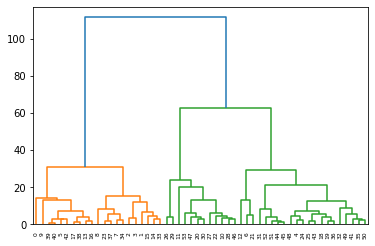

In [7]:
aux = np.broadcast_to(df.values,  (df.shape[1], *df.shape))
#result = np.sqrt(np.square(aux - aux.transpose()).sum(axis=1))

#also possible:
res = scipy.spatial.distance.pdist(df.transpose(), metric='euclidean') #

###NEXT: Cluster based on this distance matrix!!!
# res is a condensed distance matrix

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
clust=linkage(res, method="complete")

Z = sch.linkage(res, method='ward')
dendrogram = sch.dendrogram(Z)
plt.savefig('Q27_dendrogram.png',transparent=True)

In [4]:
from scipy.cluster.hierarchy import cut_tree
#Zijin: the first 0 relates to first column of df, which is the very earlierst date
print(cut_tree(Z, n_clusters = 2).T) # Printing transpose just for spa

[[0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1
  1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1]]


In [8]:
print(cut_tree(Z, n_clusters = 3).T)

[[0 0 0 0 1 0 1 0 0 0 2 2 1 0 0 0 0 0 1 1 2 1 2 0 1 1 2 2 2 2 2 1 1 0 0 1
  1 0 0 0 0 1 0 1 1 1 2 2 1 1 1 1 1 2]]
